In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.datasets as dset
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from torch.autograd import Variable

# 모델 정의
## nn.Sequential을 이용


In [21]:
model = nn.Sequential(
    nn.Linear(784,256), # w와 b가 내재되어있음
    nn.Sigmoid(),
    nn.Linear(256, 128),
    nn.Linear(128, 10),
)

# data loading

In [22]:
mnist_train = dset.MNIST('',train=True, transform=transforms.ToTensor(),
                           target_transform=None, download=True)
mnist_test = dset.MNIST('', train=False, transform=transforms.ToTensor(),
                        target_transform=None, download=True)


# data 확인

In [23]:
print(len(mnist_train), len(mnist_test))


60000 10000


In [24]:
image, label = mnist_train.__getitem__(0)
print(image.size())
print(label)

torch.Size([1, 28, 28])
5


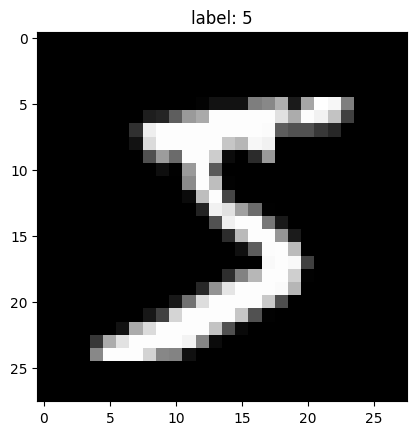

In [25]:
img = image.numpy()
plt.title('label: %d' %label)
plt.imshow(img[0], cmap='gray')
plt.show()

# hyperparameter 설정
# dataset load 함수

In [26]:
batch_size = 1024
learning_rate = 0.01
num_epoch = 200

In [27]:
train_loader = torch.utils.data.DataLoader(mnist_train,
                                           batch_size = batch_size,
                                           shuffle=True,
                                           num_workers=2,#전처리기, 하나 작업할때 미리 2개가 준비해라
                                           drop_last=True) # 배치사이즈만큼 자르고 남은건 버림
test_loader = torch.utils.data.DataLoader(mnist_test,
                                           batch_size = batch_size,
                                           shuffle=True,
                                           num_workers=2,
                                           drop_last=True)

# image 그리기

0 1


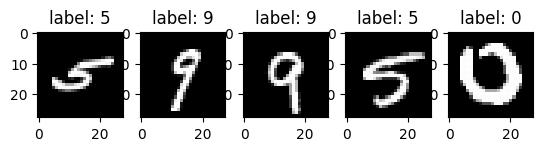

1 28


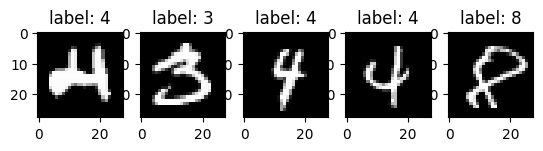

2 28


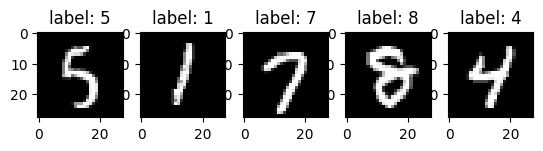

3 28


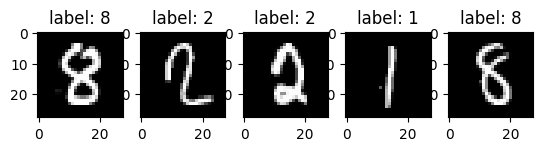

In [28]:
n = 5 # 한줄에 그릴 image 갯수
limit = 3 #  몇줄 그릴지 결정

for i ,[imgs, labels] in enumerate(test_loader):
    if i>limit:
        break

    print(i, len(img))
    for j in range(n):
        img = imgs[j].numpy()
        img = img.reshape((img.shape[1], img.shape[2])) # (1,28,28) -> (28,28)

        plt.subplot(1, n, j+1)
        plt.imshow(img, cmap='gray')
        plt.title('label: %d' %labels[j])
    plt.show()

# accuracy를 측정하는 함수

In [29]:
def EstimateAccuracy(dloader, imodel):
    correct = 0
    total = 0

    for j, [imgs, labels] in enumerate(dloader):
        img = imgs
        label  = Variable(labels)  # y(실제값), cuda를 사용한다면 Variable(labels).cuda()

        img = img.reshape((img.shape[0], img.shape[2], img.shape[3]))
        img = img.reshape((img.shape[0], img.shape[1]*img.shape[2]))
        img = Variable(img, requires_grad=False)

        output = imodel(img)
        _, output_index = torch.max(output, 1)  # 가장 큰 값을 취함

        total += label.size(0)
        correct += (output_index == label).sum().float()

    print('Acuuracy: {}'.format(100*correct/total))



In [30]:
EstimateAccuracy(test_loader, model)

Acuuracy: 10.17795181274414


# loss함수와 optimizer 설정

In [31]:
loss_func = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=learning_rate)

# 훈련

In [ ]:
num_epoch = 400
for i in range(num_epoch):
    for j, [imgs, labels] in enumerate(train_loader):
        img = imgs
        label = labels

        img = img.reshape((img.shape[0], img.shape[2], img.shape[3]))
        img = img.reshape((img.shape[0], img.shape[1]*img.shape[2]))
        img = Variable(img, requires_grad=False)

        optimizer.zero_grad()
        output = model(img)
        loss = loss_func(output, label)
        loss.backward()
        optimizer.step()

    if(i%2 ==50):
        print(f'{i}..')
        EstimateAccuracy(test_loader, model)
        print(loss)